In [7]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import load_digits

In [16]:
from sklearn.datasets import fetch_openml

In [9]:
mnist = load_digits()

In [17]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [39]:
X, y = mnist["data"], mnist["target"]

In [20]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [41]:
y = y.astype(int)

In [42]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

In [43]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

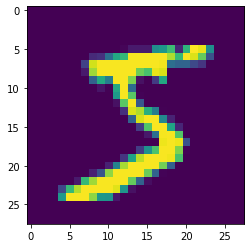

In [44]:
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

In [45]:
print(y_train[:30])
y_train_5 = (y_train == 5) #true when a y train value is 5
y_test_5 = (y_test == 5) #similar 
print(y_train_5[:30]) #check the before and after y values for the first 20 rows

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7]
[ True False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False]


In [84]:
y_dict = {}
for i in range(0,10):
    y_dict['train_'f'{i}'] = (y_train == i)

y_dict

{'train_0': array([False,  True, False, ..., False, False, False]),
 'train_1': array([False, False, False, ..., False, False, False]),
 'train_2': array([False, False, False, ..., False, False, False]),
 'train_3': array([False, False, False, ..., False, False, False]),
 'train_4': array([False, False,  True, ..., False, False, False]),
 'train_5': array([ True, False, False, ...,  True, False, False]),
 'train_6': array([False, False, False, ..., False,  True, False]),
 'train_7': array([False, False, False, ..., False, False, False]),
 'train_8': array([False, False, False, ..., False, False,  True]),
 'train_9': array([False, False, False, ..., False, False, False])}

In [100]:
for i in y_dict.keys():
    print(i ,y_dict[i])

train_0 [False  True False ... False False False]
train_1 [False False False ... False False False]
train_2 [False False False ... False False False]
train_3 [False False False ... False False False]
train_4 [False False  True ... False False False]
train_5 [ True False False ...  True False False]
train_6 [False False False ... False  True False]
train_7 [False False False ... False False False]
train_8 [False False False ... False False  True]
train_9 [False False False ... False False False]


In [107]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
for i in y_dict.keys():
    print(i)
    sgd_clf.fit(X_train, y_dict[i])
    sgd_clf.predict(X_test)
    

train_0
train_1
train_2
train_3
train_4
train_5
train_6
train_7
train_8
train_9


In [108]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [109]:
sgd_clf.predict(X_test[0:25])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False])

In [51]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring="accuracy")


array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [52]:
from sklearn.model_selection import cross_val_predict
y_train_5_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [53]:
y_train_5_pred

array([ True, False, False, ...,  True, False, False])